In [1]:

#moving avg window
#datasetdir = "../datasets/allfaultdatasetfiltered13.csv"
figuredir = "../figures/LSTM/"

import os

# You should change 'test' to your preferred folder.
#CHECK_FOLDER = os.path.isdir(datasetdir)

# You should change 'test' to your preferred folder.
CHECK_FOLDER = os.path.isdir(figuredir)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(figuredir)
    print("created folder : ", figuredir)

else:
    print(figuredir, "folder already exists.")

../figures/LSTM/ folder already exists.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
#%matplotlib inline 
plt.rcParams["figure.figsize"] = (15,8)

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [4]:
data = pd.read_csv('../datasets/filteredlpf/Healthy.csv')
data.info() ,  data.head()  , data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014443 entries, 0 to 1014442
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   speed          1014443 non-null  float64
 1   vibration      1014443 non-null  float64
 2   vibration_LPF  1014443 non-null  float64
 3   vibration_SMA  1014443 non-null  float64
 4   Faults         1014443 non-null  object 
dtypes: float64(4), object(1)
memory usage: 38.7+ MB


(None,
       speed  vibration  vibration_LPF  vibration_SMA   Faults
 0  0.036346   0.004049       0.003746      -0.000680  Healthy
 1  0.037003   0.003720       0.004234      -0.000562  Healthy
 2  0.036346   0.005693       0.004736      -0.000411  Healthy
 3  0.036346   0.005035       0.005229      -0.000279  Healthy
 4  0.036017   0.005693       0.005689      -0.000128  Healthy,
 (1014443, 5))

#df['vibration'].plot(color='b',figsize = (8,8))

g = sns.lineplot(x="speed", y="vibration",hue= 'Faults',
                data=data.reset_index())

plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

g.legend(loc= 'upper right')
g.legend_.set_title('Faults')

plt.savefig(figuredir + "vibration vs speed.png", bbox_inches='tight', dpi=600)


In [5]:
vibration = data['vibration_LPF']
vibration = pd.DataFrame(vibration)
vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014443 entries, 0 to 1014442
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   vibration_LPF  1014443 non-null  float64
dtypes: float64(1)
memory usage: 7.7 MB


In [6]:
vibration.head()

,vibration_LPF
0,0.003746
1,0.004234
2,0.004736
3,0.005229
4,0.005689


In [7]:
df = vibration.iloc[0:600]
df

,vibration_LPF
0,0.003746
1,0.004234
2,0.004736
3,0.005229
4,0.005689
...,...
595,0.002511
596,0.002247
597,0.002037
598,-0.001201


<AxesSubplot:>

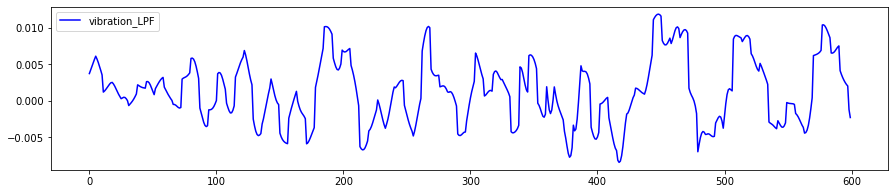

In [8]:
df.plot(color='b',figsize = (15,3))

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(df)
normalizedVibration = pd.DataFrame(normalizedVibration)

<AxesSubplot:>

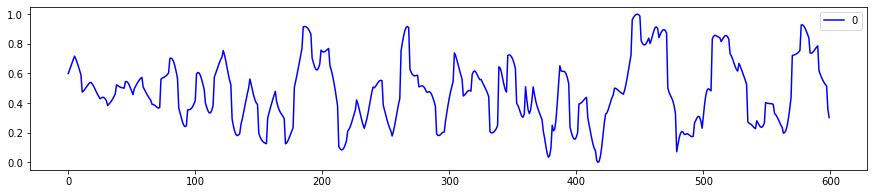

In [10]:
normalizedVibration.plot(color='b',figsize = (15,3))

In [11]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset

,0
0,0.599191
1,0.623199
2,0.647824
3,0.672055
4,0.694673
...,...
595,0.538540
596,0.525575
597,0.515226
598,0.356168


In [12]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(dataset, test_size = 0.33)

# split into train and test sets
# split into train and test sets
"""from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.33)"""


# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

Total Dataset   =  600
Training Smaple =  402
Testing Sample  =  198


In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(110, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
381/381 - 0s - loss: 0.1079
Epoch 2/50
381/381 - 0s - loss: 0.0684
Epoch 3/50
381/381 - 0s - loss: 0.0572
Epoch 4/50
381/381 - 0s - loss: 0.0555
Epoch 5/50
381/381 - 0s - loss: 0.0467
Epoch 6/50
381/381 - 0s - loss: 0.0455
Epoch 7/50
381/381 - 0s - loss: 0.0472
Epoch 8/50
381/381 - 0s - loss: 0.0476
Epoch 9/50
381/381 - 0s - loss: 0.0439
Epoch 10/50
381/381 - 0s - loss: 0.0429
Epoch 11/50
381/381 - 0s - loss: 0.0385
Epoch 12/50
381/381 - 0s - loss: 0.0429
Epoch 13/50
381/381 - 0s - loss: 0.0418
Epoch 14/50
381/381 - 0s - loss: 0.0430
Epoch 15/50
381/381 - 0s - loss: 0.0406
Epoch 16/50
381/381 - 0s - loss: 0.0412
Epoch 17/50
381/381 - 0s - loss: 0.0403
Epoch 18/50
381/381 - 0s - loss: 0.0404
Epoch 19/50
381/381 - 0s - loss: 0.0393
Epoch 20/50
381/381 - 0s - loss: 0.0374
Epoch 21/50
381/381 - 0s - loss: 0.0379
Epoch 22/50
381/381 - 0s - loss: 0.0409
Epoch 23/50
381/381 - 0s - loss: 0.0374
Epoch 24/50
381/381 - 0s - loss: 0.0377
Epoch 25/50
381/381 - 0s - loss: 0.0391
Epoch 26/

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: MAE 0.0007446764201718102
Test Score: MAE 0.0008897520335856482


In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [19]:
dataset.shape

(600, 1)

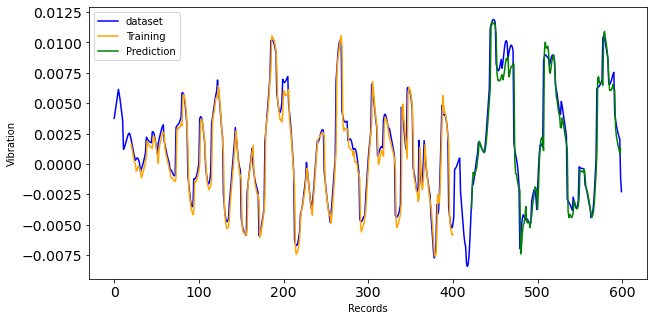

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(dataset),label='dataset',color  = 'blue')
plt.plot(trainPredictPlot, label='Training',color  = 'orange')
plt.plot(testPredictPlot,label='Prediction',color  = 'green')

plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Records")
plt.tick_params(axis='both',labelsize=14)


plt.savefig(figuredir + "LSTM_Forcasting.png", bbox_inches='tight', dpi=1200)
plt.show()
